<a href="https://colab.research.google.com/github/bayansahu/Machine_Learning/blob/main/Teachnook_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 93s 58ms/step - loss: 1.4486 - accuracy: 0.4746 - val_loss: 1.1747 - val_accuracy: 0.5818
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0585 - accuracy: 0.6279 - val_loss: 1.0208 - val_accuracy: 0.6423
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8946 - accuracy: 0.6864 - val_loss: 0.9074 - val_accuracy: 0.6834
Epoch 4/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.7893 - accuracy: 0.7244 - val_loss: 0.8647 - val_accuracy: 0.6992
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6969 - accuracy: 0.7552 - val_loss: 0.8686 - val_accuracy: 0.7070
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.6154 - accuracy: 0.7831 - val_loss: 0.8995 - val_accuracy: 0.6996
Epoch 7/10
1563/1563 [==============================] - 8

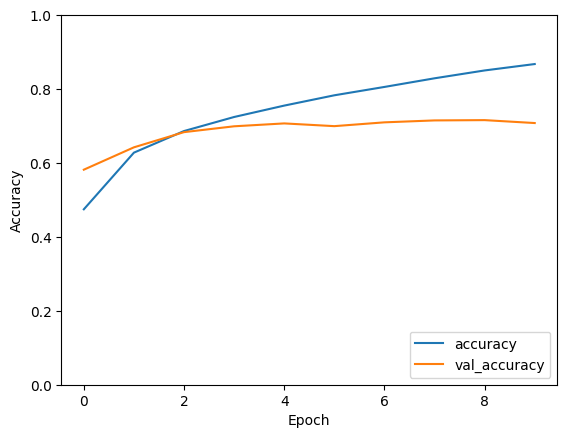

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Display training and validation accuracy curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 169ms/step


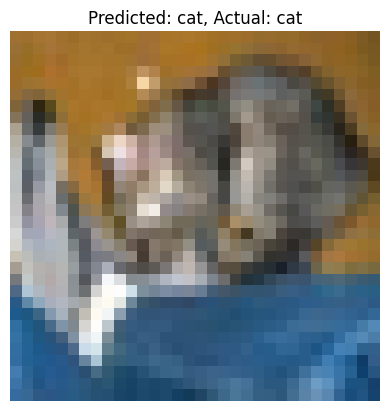

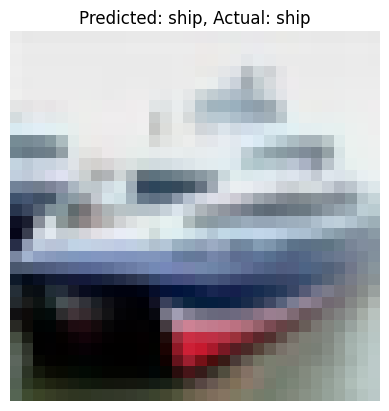

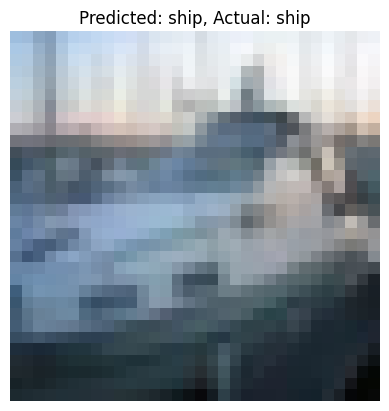

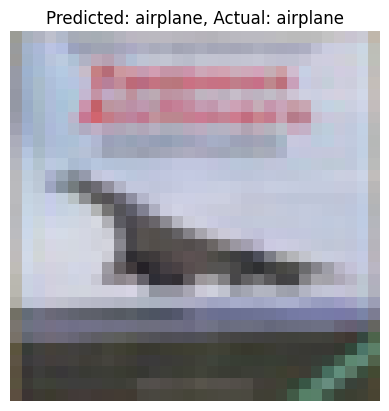

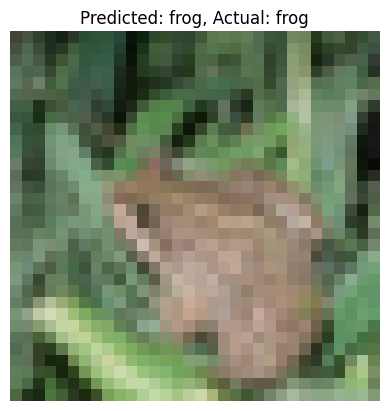

In [4]:
num_predictions = 5
test_predictions = model.predict(test_images[:num_predictions])
for i in range(num_predictions):
    predicted_class = class_names[test_predictions[i].argmax()]
    actual_class = class_names[test_labels[i][0]]
    plt.figure()
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
plt.show()